## Introduction:
Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science!. Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

## Goal:
We will be working to explore business possibilities for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms.

We are tasked with figuring out what is best content to write about.

## Getting the data:
To get the data, we ran following querry at https://data.stackexchange.com/datascience/query/edit/1398921:

    SELECT TOP 10 Id,
              PostTypeId,
              AcceptedAnswerId,
              Score, 
              ViewCount, 
              Tags, 
              AnswerCount, 
              CommentCount, 
              FavoriteCount
    FROM Posts;
   

## Importing Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

## Loading Dataset

In [39]:
questions = pd.read_csv('https://data.stackexchange.com/datascience/csv/1719994', 
                       parse_dates=['CreationDate'])

In [40]:
questions.head()

,Id,PostTypeID,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,48477,1,2019-04-03 01:15:38,2,715,<cnn><object-detection><faster-rcnn>,0,1.0
1,48479,1,2019-04-03 02:28:31,1,73,<machine-learning><scikit-learn><predictive-mo...,2,NaN
2,48481,1,2019-04-03 03:18:33,1,26,<machine-learning><deep-learning><computer-vis...,1,NaN
3,48482,1,2019-04-03 04:29:39,1,1034,<loss-function>,1,NaN
4,48486,1,2019-04-03 05:19:26,2,349,<machine-learning><regression><supervised-lear...,0,NaN


## Summary Statistics and Information

In [41]:
questions.describe()

,Id,PostTypeID,Score,ViewCount,AnswerCount,FavoriteCount
count,6776.000000,6776.0,6776.00000,6776.000000,6776.000000,1633.000000
mean,54391.062426,1.0,1.52863,861.509888,1.126771,1.485609
std,6615.488676,0.0,2.25164,3661.124944,0.891460,1.616003
min,43363.000000,1.0,-3.00000,8.000000,0.000000,0.000000
25%,48222.750000,1.0,0.00000,51.000000,1.000000,1.000000
50%,54378.000000,1.0,1.00000,135.000000,1.000000,1.000000
75%,60432.250000,1.0,2.00000,531.250000,1.000000,2.000000
max,65671.000000,1.0,51.00000,142408.000000,9.000000,26.000000


In [42]:
questions.shape

(6776, 8)

In [43]:
questions.columns

Index(['Id', 'PostTypeID', 'CreationDate', 'Score', 'ViewCount', 'Tags',
       'AnswerCount', 'FavoriteCount'],
      dtype='object')

In [44]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6776 entries, 0 to 6775
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             6776 non-null   int64         
 1   PostTypeID     6776 non-null   int64         
 2   CreationDate   6776 non-null   datetime64[ns]
 3   Score          6776 non-null   int64         
 4   ViewCount      6776 non-null   int64         
 5   Tags           6776 non-null   object        
 6   AnswerCount    6776 non-null   int64         
 7   FavoriteCount  1633 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 423.6+ KB


In [45]:
questions.isnull().sum()

Id                  0
PostTypeID          0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    5143
dtype: int64

**Observations**:
- Our dataset has 6776 rows and 8 columns. Essentially there were **6776 Questions asked** through out 2019
- We can see that column *FavoriteCount* has 5143 missing values   
- CreationDate is in DateTime format, Tags are objects and *FavoriteCount* are in floats. All other columns are integers

## Data Cleaning

In [46]:
questions['Tags'].head()

0                 <cnn><object-detection><faster-rcnn>
1    <machine-learning><scikit-learn><predictive-mo...
2    <machine-learning><deep-learning><computer-vis...
3                                      <loss-function>
4    <machine-learning><regression><supervised-lear...
Name: Tags, dtype: object

Lets convert these strings to Python lists within their respective columns 

In [47]:
# replacing the characters to clean the format
questions['Tags'] = questions['Tags'].str.replace('^<|>$', '')
questions['Tags'] = questions['Tags'].str.split("><")


In [48]:
questions['Tags'].head()

0                 [cnn, object-detection, faster-rcnn]
1    [machine-learning, scikit-learn, predictive-mo...
2    [machine-learning, deep-learning, computer-vis...
3                                      [loss-function]
4    [machine-learning, regression, supervised-lear...
Name: Tags, dtype: object

In [49]:
len_list = []
for element in questions['Tags']:
    lenght = len(element)
    len_list.append(lenght)
print('Maximum Lenght:\n{}\nMinimum Lenght:\n{}'.format(max(len_list), 
                                                             min(len_list)))
    

Maximum Lenght:
5
Minimum Lenght:
1


**Observation:**

So we can see that there can be maximum of 5 tags. This can be confirmed from the source as well

##### Lets look into 'FavoriteCount' column

In [50]:
questions['FavoriteCount'].head()

0    1.0
1    NaN
2    NaN
3    NaN
4    NaN
Name: FavoriteCount, dtype: float64

- Only FavoriteCount had some missing values. This could probably mean that the question was not the list of the favourites of any user. So we replaced the Null Values with Zero 

In [51]:
# Replace them with 0s
questions['FavoriteCount'] = questions['FavoriteCount'].fillna(0)

In [52]:
# Check
questions['FavoriteCount'].isnull().sum()

0

## Data Exploration

We now focus on determining the **most popular tags**.

##### How many times each tag was used.

In [53]:
unique_tag = {}
for elements in questions['Tags']:
    for element in elements:
        if element not in unique_tag:
            unique_tag[element] = 1
        else:
            unique_tag[element] += 1
    

In [54]:
df_unique_tag = pd.DataFrame(list(unique_tag.items()),columns = ['tags','count'])
df_unique_tag.sort_values(by='count', ascending=False, ignore_index=True)

,tags,count
0,machine-learning,2135
1,python,1446
2,deep-learning,890
3,neural-network,820
4,keras,706
...,...,...
490,multivariate-distribution,1
491,partial-least-squares,1
492,data-indexing-techniques,1
493,stata,1


##### How many times each tag was viewed.

In [55]:
view_tag = {}
for index, row in questions.iterrows():
    lol = row['Tags']
    views = row['ViewCount']
    for tag in lol:
        if not tag in view_tag:
            view_tag[tag] = 0
        view_tag[tag] += views
            

In [56]:
df_view_tag = pd.DataFrame(list(view_tag.items()),columns = ['tags','views'])
df_view_tag.sort_values(by='views', ascending=False, ignore_index=True)


,tags,views
0,python,2162721
1,machine-learning,1399820
2,pandas,1015071
3,keras,911009
4,deep-learning,798109
...,...,...
490,usecase,25
491,caffe,23
492,relational-dbms,18
493,state-of-the-art,17


##### Visualizations for the top tags of each of the above results

In [57]:
df_unique_tag_top = df_unique_tag.sort_values(by='count', ascending=False).iloc[:20]
df_unique_tag_top = df_unique_tag_top.set_index('tags', drop=True).sort_values(by='count')

In [58]:
df_view_tag_top = df_view_tag.sort_values(by='views', ascending=False).iloc[:20]
df_view_tag_top = df_view_tag_top.set_index('tags', drop=True).sort_values(by='views')

In [59]:
#style.available
style.use('ggplot')


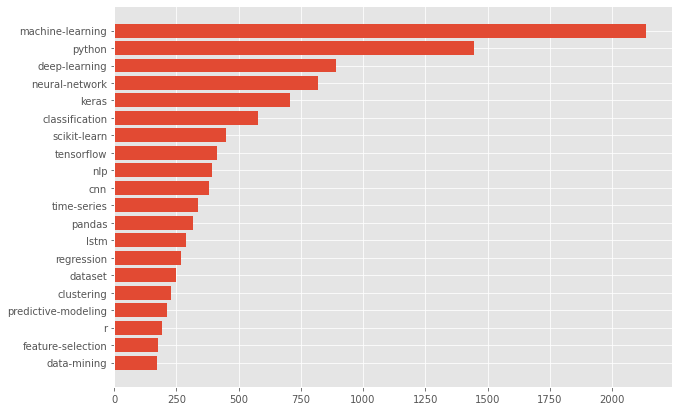

In [60]:
plt.figure(figsize=(10,7))
plt.barh(df_unique_tag_top.index, df_unique_tag_top.loc[:,'count'])
plt.show()

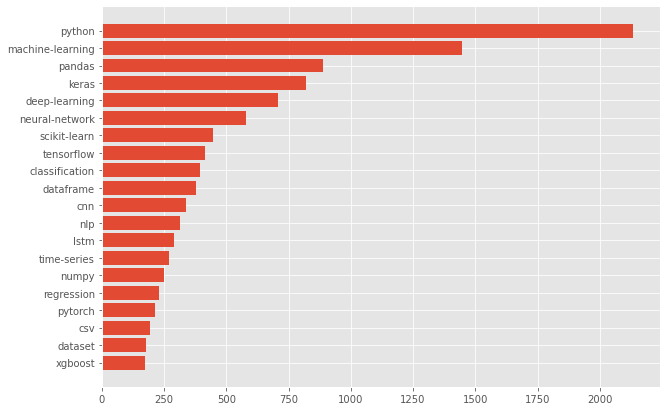

In [61]:
plt.figure(figsize=(10,7))
plt.barh(df_view_tag_top.index, df_unique_tag_top.loc[:,'count'])
plt.show()

#### Merging the both DataFrames together


In [62]:
left_merge = pd.merge(df_unique_tag_top, 
                   df_view_tag_top,
                  how='left',left_index=True, 
                   right_index=True)

In [63]:
right_merge = pd.merge(df_unique_tag_top,
                       df_view_tag_top,
                       how='right',left_index=True,
                       right_index=True)

**Observations:**
- The tags present in **left_merge** and not present in most_viewed are:
    - machine-learning-model
    - statistics
    - predictive-modeling
    - r
    - clustering
    
- And the tags present in **right_merge** but not in most_used are:
    - csv
    - pytorch
    - dataframe
    - numpy
    - xgboost

Some tags also stand out as being related. For example, python is related to pandas, as we can find both pythons and pandas in the same domain because pandas is a Python library. So by writing about pandas, we can actually simultaneously tackle two tags.

In [64]:
total_tags = questions.shape[0]
special_tags = 0
for tags in questions['Tags']:
    if 'pandas' and 'python' in tags:
        special_tags += 1
print('Total Tags:\n{}\nTags with pandas and python together:\n{}\nPercentage of such tags:\n{}'.format(total_tags,special_tags, str(round(special_tags/total_tags*100)) + str('%')))       

Total Tags:
6776
Tags with pandas and python together:
1446
Percentage of such tags:
21%


#### Finding associations between other Tags 

In [65]:
# Getting the list of all the tags
all_tags = df_unique_tag.loc[:, 'tags']
all_tags = list(all_tags)

In [66]:
# Here we created a df for all possible co occurences of elements. 
df = pd.DataFrame(index=all_tags, columns=all_tags)

# We fill the NaNs with 0 to make them numeric
df = df.fillna(0)

In [67]:
# Lets add the count in DataFrame for each pair of values occuring together
tags = []
for tag in questions['Tags']:
    tags.append(tag)

In [68]:
tags

[['cnn', 'object-detection', 'faster-rcnn'],
 ['machine-learning', 'scikit-learn', 'predictive-modeling', 'pandas'],
 ['machine-learning', 'deep-learning', 'computer-vision'],
 ['loss-function'],
 ['machine-learning', 'regression', 'supervised-learning', 'model-selection'],
 ['time-series', 'training', 'machine-learning-model', 'forecasting'],
 ['machine-learning', 'classification', 'numpy', 'gpu'],
 ['keras', 'tensorflow', 'gpu'],
 ['machine-learning', 'r', 'cloud-computing'],
 ['machine-learning', 'python', 'statistics', 'distribution'],
 ['machine-learning', 'neural-network', 'keras'],
 ['cross-validation', 'multiclass-classification', 'prediction'],
 ['r', 'csv'],
 ['machine-learning',
  'neural-network',
  'deep-learning',
  'data-augmentation',
  'image-preprocessing'],
 ['data-wrangling'],
 ['machine-learning', 'neural-network', 'anomaly-detection', 'autoencoder'],
 ['machine-learning', 'python', 'scikit-learn', 'decision-trees'],
 ['machine-learning', 'classification', 'class-i

In [69]:
for element in tags:
    df.loc[element,element] += 1

In [72]:
# Gathering top 20 Tags 
unique_top = df_unique_tag.sort_values(by='count',ascending=False)
list_unique_top20 = list(unique_top['tags'].head(20))

In [73]:
# Display the results of Top20 Tags associations with each other 
df_top20 = df.loc[list_unique_top20,list_unique_top20]
df_top20

,machine-learning,python,deep-learning,neural-network,keras,classification,scikit-learn,tensorflow,nlp,cnn,time-series,pandas,lstm,regression,dataset,clustering,predictive-modeling,r,feature-selection,data-mining
machine-learning,2135,404,326,290,146,222,160,69,93,95,106,57,43,100,79,52,100,48,81,85
python,404,1446,106,107,205,83,198,121,63,46,77,218,43,51,41,41,30,19,23,22
deep-learning,326,106,890,245,197,50,12,103,57,120,30,1,71,19,21,2,23,4,18,20
neural-network,290,107,245,820,191,54,20,80,19,95,25,1,49,40,17,4,8,6,7,4
keras,146,205,197,191,706,48,26,197,18,92,34,2,97,25,8,0,9,8,1,1
classification,222,83,50,54,48,579,41,17,31,14,19,3,13,29,21,10,24,8,17,18
scikit-learn,160,198,12,20,26,41,448,8,10,0,7,31,1,33,6,22,11,1,19,2
tensorflow,69,121,103,80,197,17,8,414,7,41,7,2,26,6,7,0,3,1,0,0
nlp,93,63,57,19,18,31,10,7,393,7,0,3,16,2,10,9,0,2,4,6
cnn,95,46,120,95,92,14,0,41,7,379,7,1,18,4,8,0,5,1,1,2


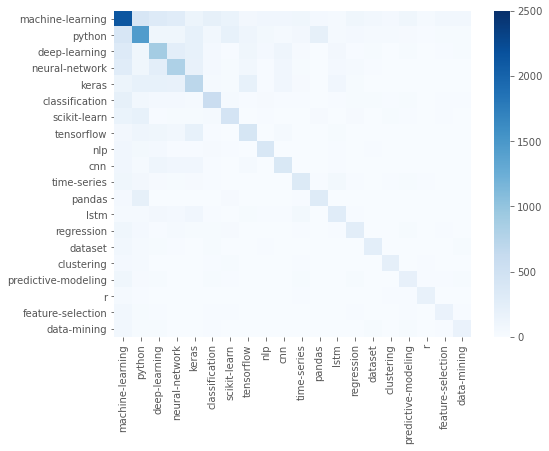

In [81]:
plt.figure(figsize=(8,6))
sns.heatmap(df_top20, cmap='Blues', annot=False, vmin=0, vmax=2500)

Observations:
- On the top right corner of the heatmap, we can see the mostly associated tags.
    - Machine Learning associates with multiple tags like python, deep-learning, neural-network, etc
- Pairs of ['pandas', 'python'] and ['tensorflow', 'keras'] are also mildly associated 
- A caveat for this way of checking associations is that it is only checking the assoication in pairs.
    

# TBC!!!